In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir("D:\Exams\Regression\Regresion practice paper\Logistic Regression\Logistic Regression")
os.listdir()

['LoanDefaults.docx',
 'loans.csv',
 'Logistic Practice Question.ipynb',
 '~$anDefaults.docx']

#### Reading the dataset

In [3]:
loans = pd.read_csv("loans.csv")
loans.head().T

,0,1,2,3,4
credit.policy,1,1,1,1,1
purpose,debt_consolidation,credit_card,debt_consolidation,debt_consolidation,credit_card
int.rate,0.1189,0.1071,0.1357,0.1008,0.1426
installment,829.1,228.22,366.86,162.34,102.92
log.annual.inc,11.3504,11.0821,10.3735,11.3504,11.2997
dti,19.48,14.29,11.63,8.1,14.97
fico,737,707,682,712,667
days.with.cr.line,5639.96,2760,4710,2699.96,4066
revol.bal,28854,33623,3511,33667,4740
revol.util,52.1,76.7,25.6,73.2,39.5


In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
loans.shape

(9578, 14)

In [11]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [13]:
loans.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

All atributes have atleast two different values

## Exploratory Data Analysis

#### Checking for NA values

In [14]:
loans.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [15]:
loans[loans.isnull().any(axis=1)]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


There are no missing values

#### Checking for no of defaulters.

In [23]:
loans['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

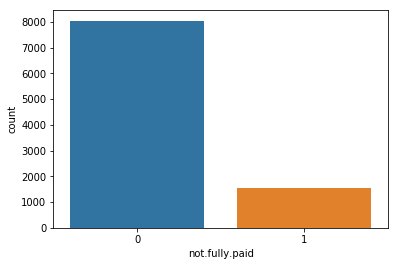

In [26]:
import seaborn as sns

sns.countplot(loans['not.fully.paid'])

Here the target class is imbalanced. There are more records of fully paid borrowers compared to not fully paid borrowers. This could be an issue when we make our prediction. Now going ahead with the prediction

#### Checking distribution of variables.

In [28]:
import seaborn as sns
%matplotlib inline

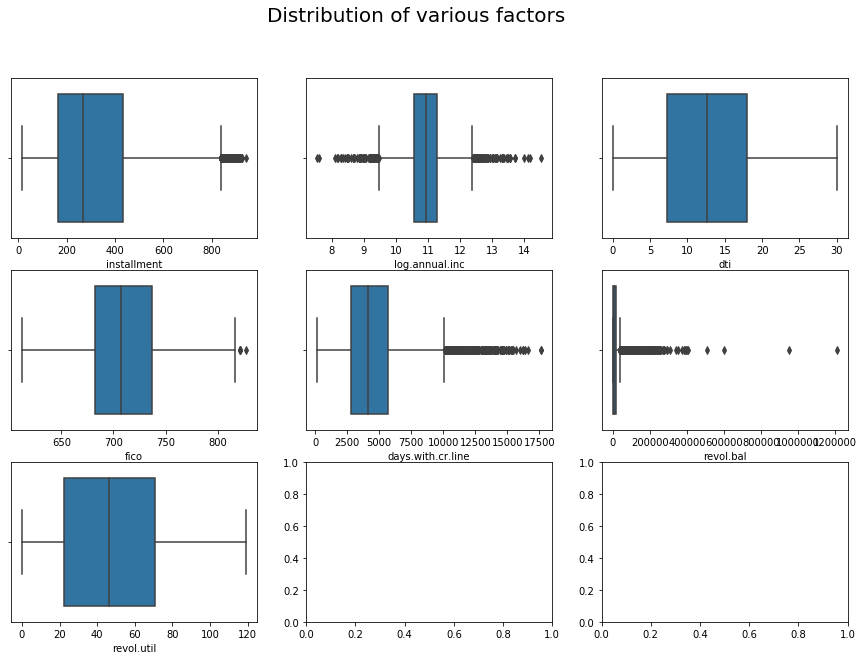

In [30]:
fig,ax = plt.subplots(3,3, figsize=(15,10))               
plt.suptitle("Distribution of various factors", fontsize=20)
sns.boxplot(loans['installment'], ax = ax[0,0]) 
sns.boxplot(loans['log.annual.inc'], ax = ax[0,1]) 
sns.boxplot(loans['dti'], ax = ax[0,2]) 
sns.boxplot(loans['fico'], ax = ax[1,0]) 
sns.boxplot(loans['days.with.cr.line'], ax = ax[1,1]) 
sns.boxplot(loans['revol.bal'], ax = ax[1,2])
sns.boxplot(loans['revol.util'], ax = ax[2,0])
plt.show()

There are outliers

In [31]:
loans['revol.bal'][loans['revol.bal']>500000] = 500000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


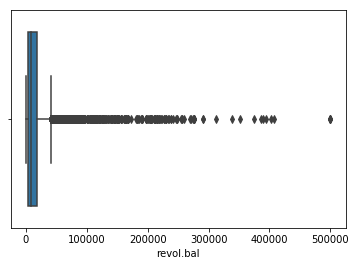

In [33]:
sns.boxplot(loans['revol.bal'])

#### Checking distribution of various factors

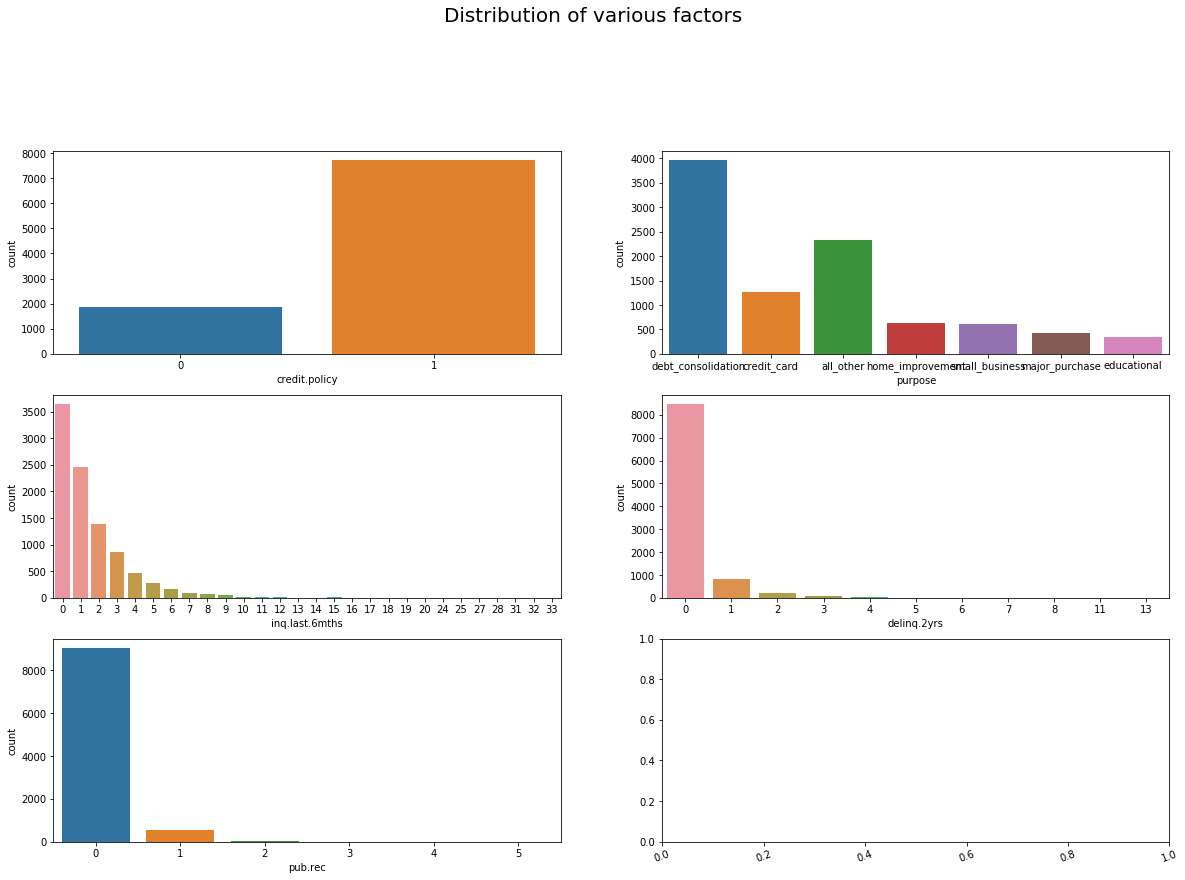

In [39]:
fig,ax = plt.subplots(3,2, figsize=(20,20))            
plt.suptitle("Distribution of various factors", fontsize=20)
sns.countplot(loans['credit.policy'], ax = ax[0,0]) 
sns.countplot(loans['purpose'], ax = ax[0,1]) 
sns.countplot(loans['inq.last.6mths'], ax = ax[1,0]) 
sns.countplot(loans['delinq.2yrs'], ax = ax[1,1])
sns.countplot(loans['pub.rec'], ax = ax[2,0])  
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

Comment on the plots

#### Ploting a correlation map for all numeric variables

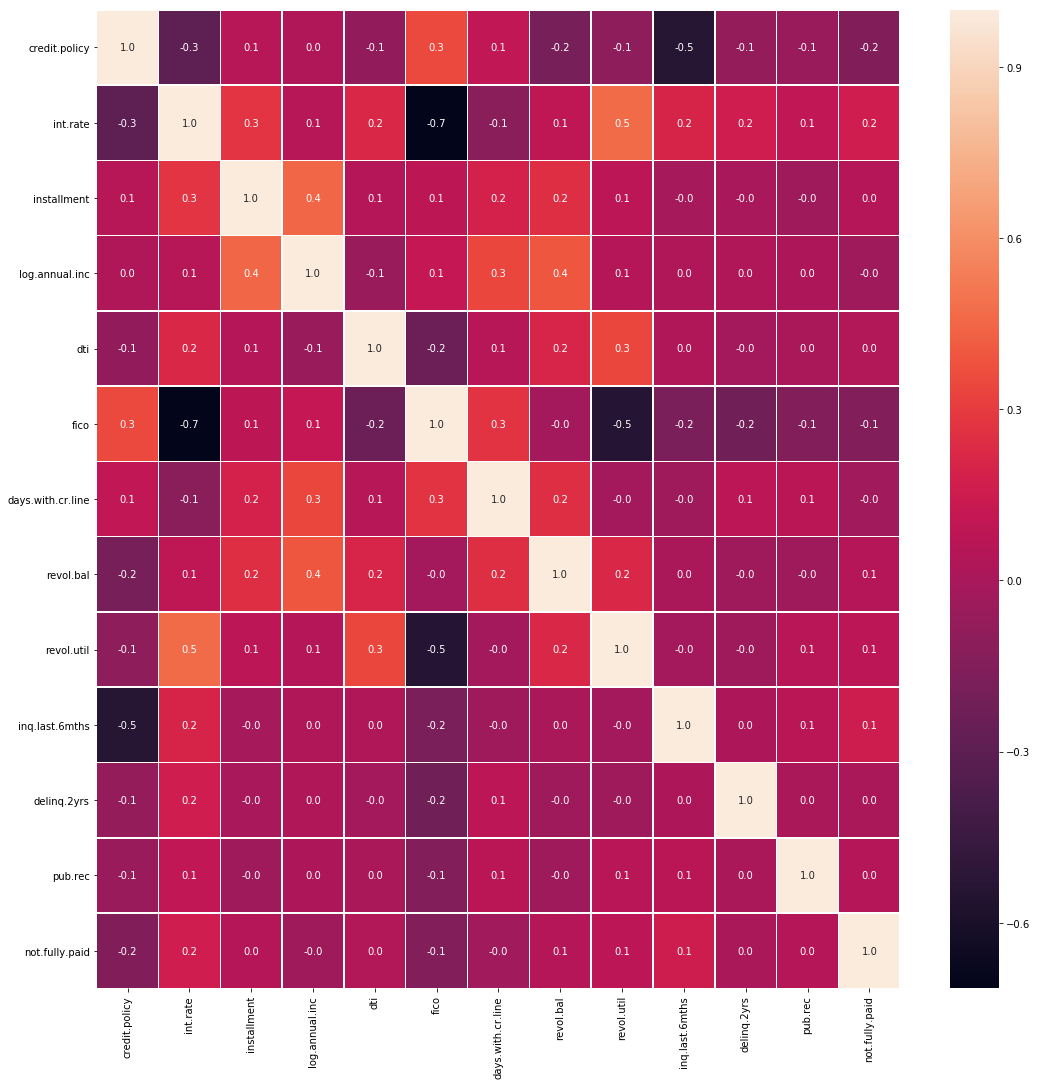

In [41]:

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(loans.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

#### Checking scatter plot of all variables with one other

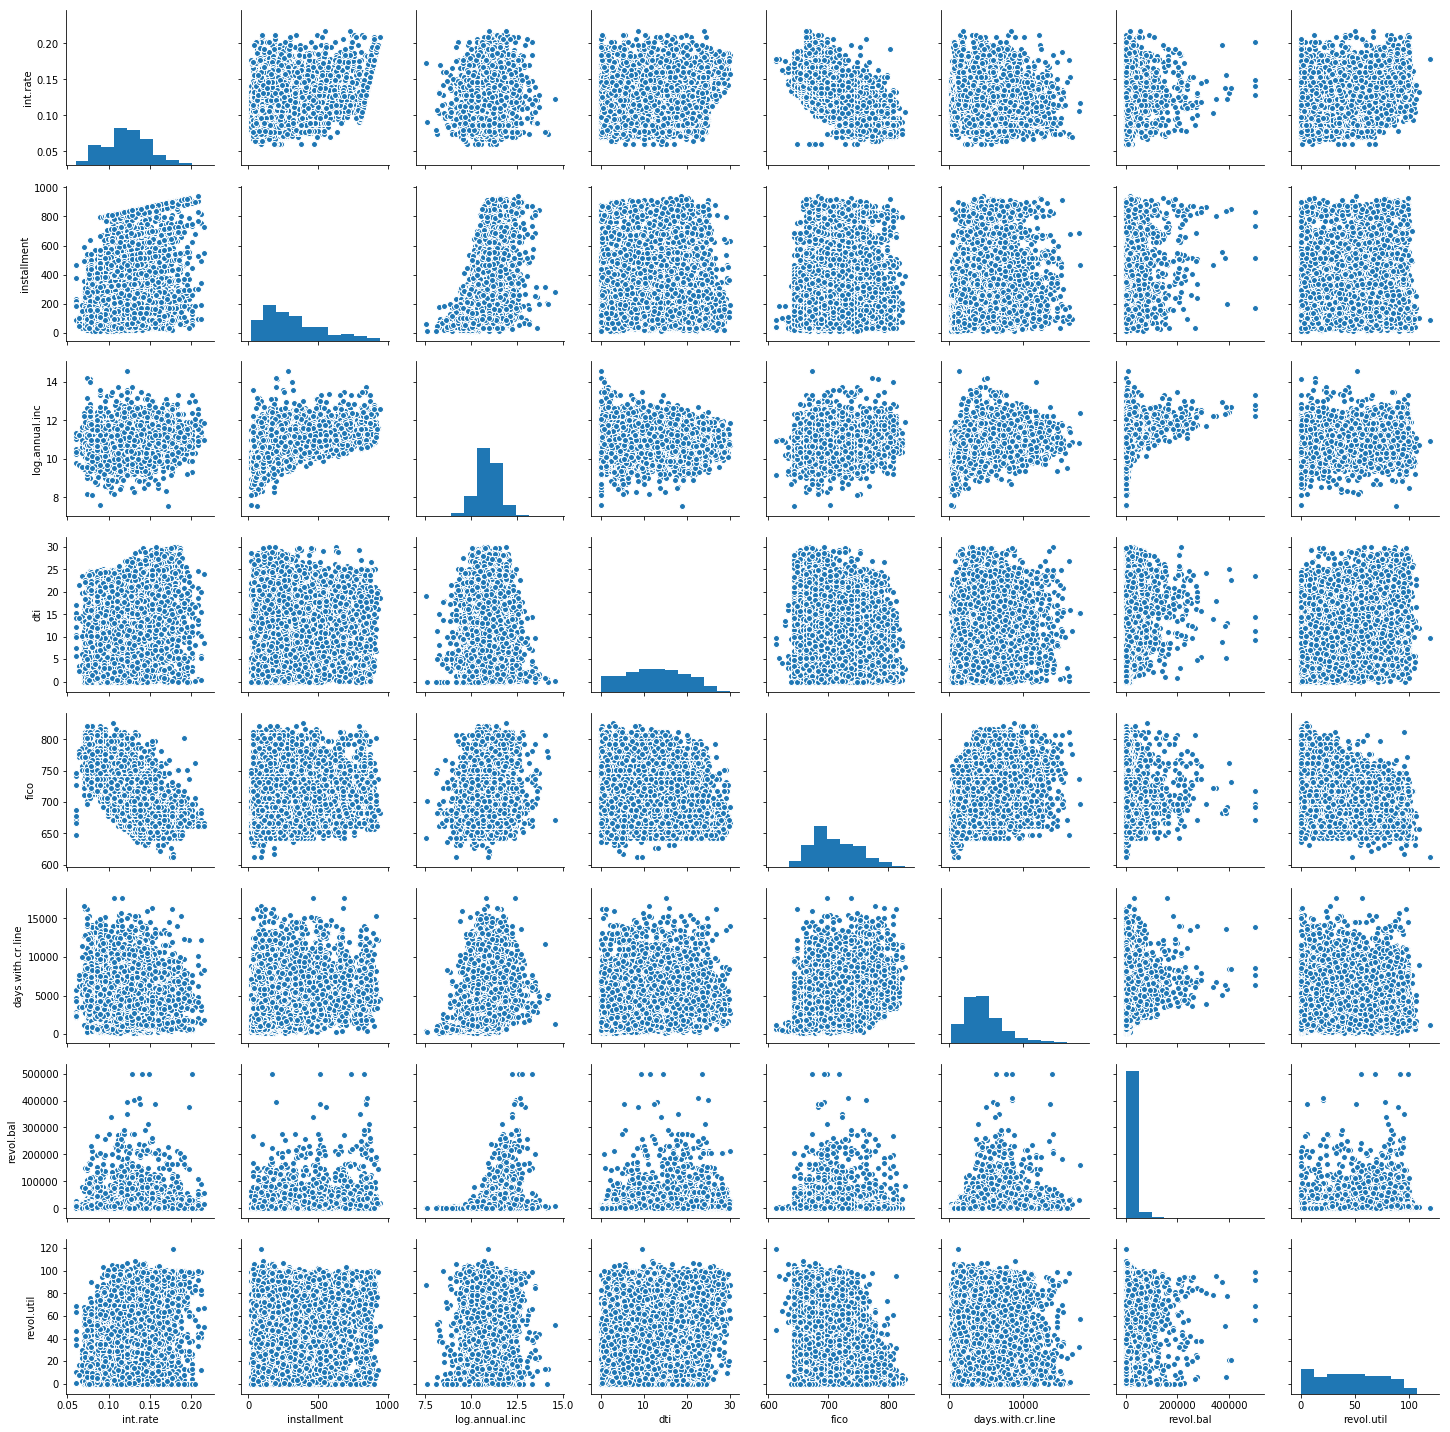

In [53]:
sns.pairplot(loans[['int.rate', 'installment', 'log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']], kind = 'scatter')

#### Create an overlapping histogram of FICO distributions, one for each credit.policy outcome.


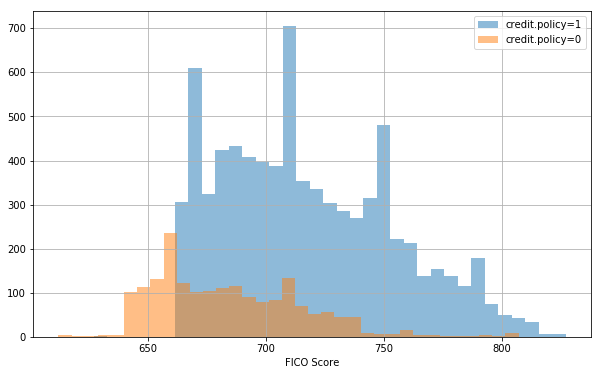

In [44]:

plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35,alpha=0.5,label='credit.policy=1')
loans[loans['credit.policy']==0]['fico'].hist(bins=35,alpha=0.5,label='credit.policy=0')
plt.xlabel('FICO Score')
plt.legend()

As expected, consumers with higher FICO scores tend to meet the credit underwriting criteria.

#### Create a similar figure, except this time select by the not.fully.paid column.

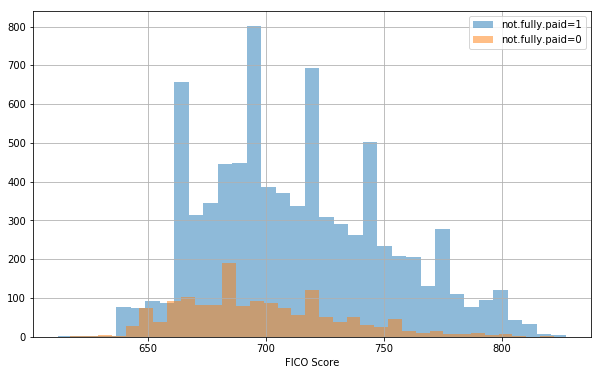

In [43]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35,alpha=0.5,label='not.fully.paid=1')
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35,alpha=0.5,label='not.fully.paid=0')
plt.xlabel('FICO Score')
plt.legend()

Although there is an imbalanced representation of classes here, there is little difference between the distribution of FICO scores of those that have fully paid their balances and those that have not.

Let's see the trend between FICO score and interest rate.

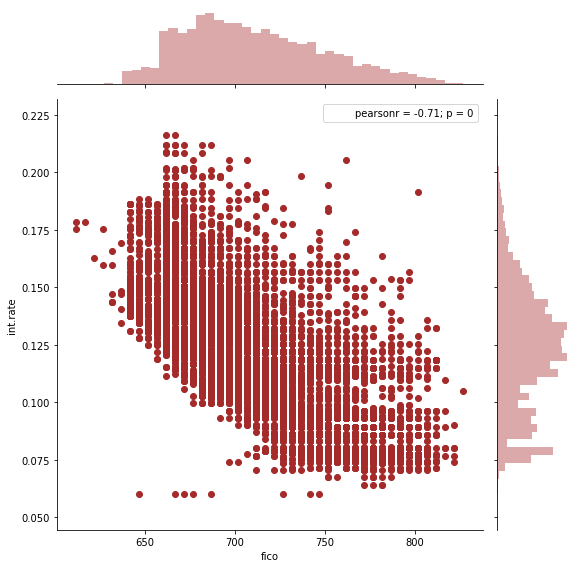

In [48]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='brown',size=8)

This makes sense since lower FICO scores tend to be correlated with higher interest rates and vice versa.

Checking whether the trend differed between not.fully.paid and credit.policy.

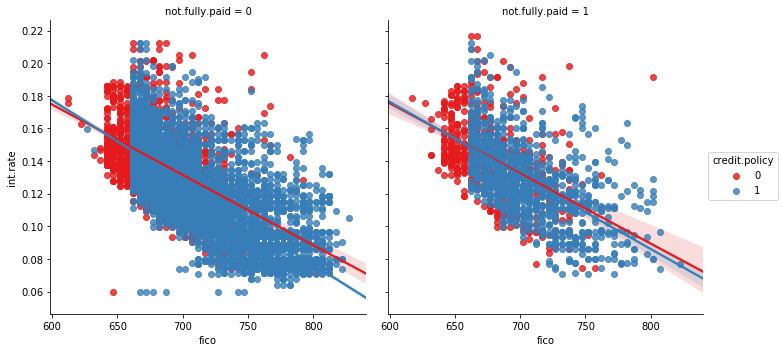

In [46]:
sns.lmplot(x='fico',y='int.rate',data=loans,col='not.fully.paid',hue='credit.policy',palette='Set1')

The trend of FICO score and interest rate is similar as we expect for those that fully paid balances versus those that did not.

Making buckets of numerical variables

In [419]:
bins_delinq = [-1,0, 3, 7,13]
bins_fico=[600,650,700,850]
bins_ir=[0.0,0.1,0.15,0.2,0.25]
bins_pr=[-1,0,1,3,5]
bins_6mths=[-1,0,9,18,27,36]

In [ ]:
loan['delinq.2yrs'] = pd.cut(loan['delinq.2yrs'], bins_delinq)
loan['int.rate']=pd.cut(loan['int.rate'], bins_ir)
loan['fico']=pd.cut(loan['fico'], bins_fico)
loan['pub.rec']=pd.cut(loan['pub.rec'], bins_pr)
loan['inq.last.6mths']=pd.cut(loan['inq.last.6mths'], bins_6mths)

#### WOE and IV Calculation

In [412]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):


    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
    # print(iv)

    return iv, data

In [413]:
iv, data = calc_iv(loans, 'int.rate', 'not.fully.paid')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


In [414]:
iv

0.45924479478894986

In [415]:
data

,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,int.rate,0.0600,8,8,0,0.000835,0.000000,0.000994,0.000000,0.000000,0.000000
1,int.rate,0.0639,4,4,0,0.000418,0.000000,0.000497,0.000000,0.000000,0.000000
2,int.rate,0.0676,9,9,0,0.000940,0.000000,0.001119,0.000000,0.000000,0.000000
3,int.rate,0.0705,23,20,3,0.002401,0.130435,0.002486,0.001957,0.239296,0.000127
4,int.rate,0.0712,9,9,0,0.000940,0.000000,0.001119,0.000000,0.000000,0.000000
5,int.rate,0.0714,28,27,1,0.002923,0.035714,0.003356,0.000652,1.638013,0.004429
6,int.rate,0.0737,32,31,1,0.003341,0.031250,0.003853,0.000652,1.776163,0.005686
7,int.rate,0.0740,72,71,1,0.007517,0.013889,0.008825,0.000652,2.604856,0.021290
8,int.rate,0.0743,33,30,3,0.003445,0.090909,0.003729,0.001957,0.644761,0.001143
9,int.rate,0.0751,38,37,1,0.003967,0.026316,0.004599,0.000652,1.953094,0.007708


In [418]:
final_data  = pd.get_dummies(loans)
final_data.head().T

,0,1,2,3,4
credit.policy,1.000000,1.000000,1.000000,1.000000,1.000000
int.rate,0.118900,0.107100,0.135700,0.100800,0.142600
installment,829.100000,228.220000,366.860000,162.340000,102.920000
log.annual.inc,11.350407,11.082143,10.373491,11.350407,11.299732
dti,19.480000,14.290000,11.630000,8.100000,14.970000
fico,737.000000,707.000000,682.000000,712.000000,667.000000
days.with.cr.line,5639.958333,2760.000000,4710.000000,2699.958333,4066.000000
revol.bal,28854.000000,33623.000000,3511.000000,33667.000000,4740.000000
revol.util,52.100000,76.700000,25.600000,73.200000,39.500000
inq.last.6mths,0.000000,0.000000,1.000000,1.000000,0.000000


In [58]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_all_other             9578 non-null uint8
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9

#### Splitting to training and testing data

In [324]:
from sklearn.cross_validation import train_test_split
import random
np.random.seed(40)
train,test = train_test_split(final_data, test_size = 0.3)

In [325]:
train.count()

credit.policy                 6704
int.rate                      6704
installment                   6704
log.annual.inc                6704
dti                           6704
fico                          6704
days.with.cr.line             6704
revol.bal                     6704
revol.util                    6704
inq.last.6mths                6704
delinq.2yrs                   6704
pub.rec                       6704
not.fully.paid                6704
purpose_all_other             6704
purpose_credit_card           6704
purpose_debt_consolidation    6704
purpose_educational           6704
purpose_home_improvement      6704
purpose_major_purchase        6704
purpose_small_business        6704
dtype: int64

In [326]:
test.count()

credit.policy                 2874
int.rate                      2874
installment                   2874
log.annual.inc                2874
dti                           2874
fico                          2874
days.with.cr.line             2874
revol.bal                     2874
revol.util                    2874
inq.last.6mths                2874
delinq.2yrs                   2874
pub.rec                       2874
not.fully.paid                2874
purpose_all_other             2874
purpose_credit_card           2874
purpose_debt_consolidation    2874
purpose_educational           2874
purpose_home_improvement      2874
purpose_major_purchase        2874
purpose_small_business        2874
dtype: int64

In [4]:
X_features = list(final_data.columns )
X_features.remove( 'not.fully.paid')
X_features

NameError: name 'final_data' is not defined

In [5]:
X_train =  train[X_features]
y_train = train["not.fully.paid"]
X_train.head().T

NameError: name 'train' is not defined

In [ ]:
X_test=test[X_features]
y_test= test["not.fully.paid"]
X_train.head().T

#### Checking distribution of target variable in train and test

In [334]:
y_train.value_counts()

0    5657
1    1047
Name: not.fully.paid, dtype: int64

In [335]:
1047/(5657+1047)

0.15617541766109785

In [336]:
y_test.value_counts()

0    2388
1     486
Name: not.fully.paid, dtype: int64

In [90]:
486/(2388+486)

0.16910229645093947

Here the dstribution of target variable is almost equal for both train and test data.

### Building logistic regression model

In [337]:
import statsmodels.api as sm
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.404340
         Iterations 7


In [223]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         not.fully.paid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6685
Method:                           MLE   Df Model:                           18
Date:                Thu, 23 Aug 2018   Pseudo R-squ.:                 0.06678
Time:                        12:59:32   Log-Likelihood:                -2710.7
converged:                       True   LL-Null:                       -2904.7
                                        LLR p-value:                 2.986e-71
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          7.0323   2.78e+06   2.53e-06      1.000   -5.45e+06    5.45e+06
credit.policy                 -0.2868      0.102     -2.800      0.005      -0.488      -0.086
days.with.cr.line            1.36e-05   1.64e-05      0.831      0.406   -1.85e-05    4.56e-05
delinq.2yrs                   -0.0574      0.065     -0.886      0.376      -0.185       0.070
dti                           -0.0029      0.006     -0.530      0.596      -0.014       0.008
fico                          -0.0091      0.002     -5.299      0.000      -0.012      -0.006
inq.last.6mths                 0.0910      0.017      5.404      0.000       0.058       0.124
installment                    0.0013      0.000      6.434      0.000       0.001       0.002
int.rate                       1.0177      2.075      0.490      0.624      -3.049       5.085
log.annual.inc                -0.3597      0.072     -5.023      0.000      -0.500      -0.219
pub.rec                        0.2183      0.115      1.901      0.057      -0.007       0.443
purpose_all_other              1.0494   2.78e+06   3.77e-07      1.000   -5.45e+06    5.45e+06
purpose_credit_card            0.4914   2.78e+06   1.77e-07      1.000   -5.45e+06    5.45e+06
purpose_debt_consolidation     0.6527   2.78e+06   2.35e-07      1.000   -5.45e+06    5.45e+06
purpose_educational            1.2356   2.78e+06   4.44e-07      1.000   -5.45e+06    5.45e+06
purpose_home_improvement       1.2442   2.78e+06   4.47e-07      1.000   -5.45e+06    5.45e+06
purpose_major_purchase         0.7688   2.78e+06   2.76e-07      1.000   -5.45e+06    5.45e+06
purpose_small_business         1.5902   2.78e+06   5.72e-07      1.000   -5.45e+06    5.45e+06
revol.bal                       3e-06   1.18e-06      2.532      0.011    6.77e-07    5.32e-06
revol.util                     0.0028      0.002      1.826      0.068      -0.000       0.006
==============================================================================================
"""

### Find significant variables

In [338]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [339]:
significant_vars = get_significant_vars( lg )
significant_vars

['credit.policy',
 'installment',
 'log.annual.inc',
 'fico',
 'revol.bal',
 'inq.last.6mths']

Going ahead with significant vcariables

In [340]:
X_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
6649,1,0.1774,504.30,11.461632,22.19,662,4421.000000,19828,53.6,1,0,0,0,0,1,0,0,0,0
4383,1,0.1461,689.51,11.652687,1.82,767,5821.000000,1,0.0,2,0,0,0,0,0,0,0,1,0
8821,0,0.1759,107.85,10.759072,29.74,662,4500.000000,2663,20.3,0,1,0,0,0,0,1,0,0,0
1977,1,0.1253,502.00,11.734468,15.83,702,6420.041667,109255,63.4,0,2,0,0,0,0,0,0,0,1
8378,0,0.1861,419.29,10.915088,1.66,652,2280.000000,2097,17.0,4,1,0,1,0,0,0,0,0,0


In [341]:
x_train = X_train[['credit.policy','fico','inq.last.6mths','installment','log.annual.inc','revol.bal']]
x_test = X_test[['credit.policy','fico','inq.last.6mths','installment','log.annual.inc','revol.bal']]

In [342]:
logit = sm.Logit( y_train, sm.add_constant( x_train ) )
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.411057
         Iterations 6


In [343]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         not.fully.paid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6697
Method:                           MLE   Df Model:                            6
Date:                Thu, 23 Aug 2018   Pseudo R-squ.:                 0.05128
Time:                        15:30:37   Log-Likelihood:                -2755.7
converged:                       True   LL-Null:                       -2904.7
                                        LLR p-value:                 2.331e-61
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.6767      0.995      7.716      0.000       5.727       9.627
credit.policy     -0.2935      0.101     -2.900      0.004      -0.492      -0.095
fico              -0.0089      0.001     -8.326      0.000      -0.011      -0.007
inq.last.6mths     0.1014      0.017      6.050      0.000       0.069       0.134
installment        0.0013      0.000      7.208      0.000       0.001       0.002
log.annual.inc    -0.3251      0.069     -4.731      0.000      -0.460      -0.190
revol.bal       3.373e-06    1.1e-06      3.053      0.002    1.21e-06    5.54e-06
==================================================================================
"""

#### Predict Test Data and Measure Accuracy

In [344]:
from sklearn import metrics
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,
                               "predicted_prob": lg.predict( sm.add_constant( x_test ) ) } )
    return y_pred_df

In [345]:
y_pred_df = get_predictions( y_test, lg )

In [346]:
y_pred_df[0:10]

,actual,predicted_prob
3771,0,0.068668
8002,0,0.561476
3860,0,0.060588
5414,0,0.224784
8018,0,0.774318
912,0,0.110676
4427,0,0.127295
4976,0,0.084938
565,1,0.197176
7129,0,0.054711


#### Predicting the target variables

In [347]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0) 
y_pred_df[0:10]

,actual,predicted_prob,predicted
3771,0,0.068668,0
8002,0,0.561476,1
3860,0,0.060588,0
5414,0,0.224784,0
8018,0,0.774318,1
912,0,0.110676,0
4427,0,0.127295,0
4976,0,0.084938,0
565,1,0.197176,0
7129,0,0.054711,0


### Create confusion matrix to find out Sensitivity and specificity

In [348]:
import seaborn as sn
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [349]:
metrics.confusion_matrix(y_pred_df.actual,y_pred_df.predicted)

array([[2381,    7],
       [ 478,    8]], dtype=int64)

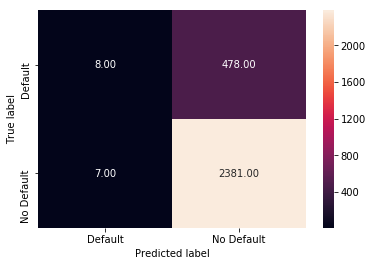

In [350]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

#### Overall accuracy of the model 

In [351]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.83


In [352]:
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted ), 2 ) )

Precision :  0.53


In [353]:
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted ), 2 ) )

Recall :  0.02


In [354]:
cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )
cm1

array([[   8,  478],
       [   7, 2381]], dtype=int64)

In [355]:
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])

In [356]:
print('Sensitivity : ', round( sensitivity, 2) )

Sensitivity :  0.02


In [357]:
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

In [358]:
print('Specificity : ', round( specificity, 2 ) )

Specificity :  1.0


### Predicted Probability distribution Plots for Defaults and Non Defaults 

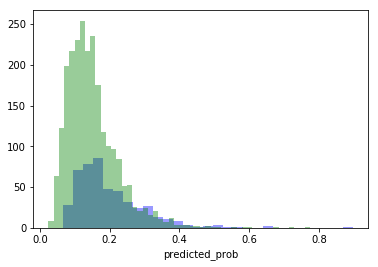

In [359]:
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'b' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'g' )

### ROC Plot

In [360]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob  )
round( float( auc_score ), 2 )

0.68

In [361]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

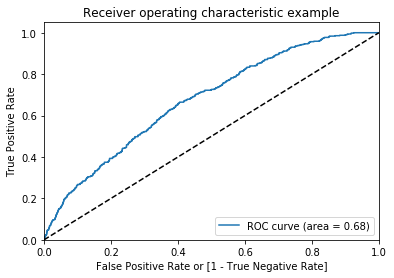

In [362]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob )

### Find optimal cutoff probability using cost

In [363]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:10]


,fpr,thresholds,tpr,diff
1289,0.404941,0.150749,0.664609,0.259668
1290,0.405360,0.150694,0.664609,0.259249
1285,0.403685,0.150864,0.662551,0.258866
1291,0.405779,0.150687,0.664609,0.258830
1286,0.404104,0.150829,0.662551,0.258448
1292,0.406198,0.150664,0.664609,0.258411
1275,0.400335,0.151273,0.658436,0.258101
1287,0.404523,0.150826,0.662551,0.258029
1293,0.406616,0.150645,0.664609,0.257993
1276,0.400754,0.151174,0.658436,0.257682


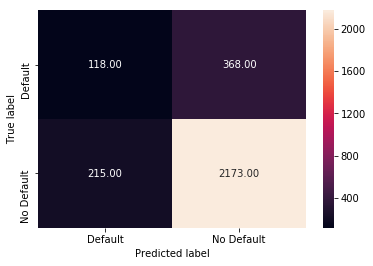

In [364]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.25 else 0)
draw_cm( y_pred_df.actual, y_pred_df.predicted_new )

In [365]:
cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_new, [1,0] )
cm_mat = np.array( cm )

In [366]:
def get_total_cost( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * 2 + cm_mat[0,1] * 1

In [367]:
get_total_cost( y_pred_df.actual, y_pred_df.predicted_new )

1104

In [368]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [369]:
idx = 0
for each_prob in range( 20, 50):
    cost = get_total_cost( y_pred_df.actual,
                          y_pred_df.predicted_prob.map(
            lambda x: 1 if x > (each_prob/100)  else 0) )
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

In [370]:
cost_df.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
0,0.20,885.0
1,0.21,930.0
2,0.22,993.0
3,0.23,1044.0
4,0.24,1068.0


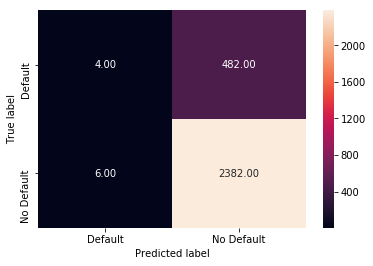

In [371]:
y_pred_df['predicted_final'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.55 else 0)
draw_cm( y_pred_df.actual, y_pred_df.predicted_final )

In [372]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted_final ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted_final ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted_final ), 2 ) )

cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_final, [1,0] )

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.83
Precision :  0.4
Recall :  0.01
Sensitivity :  0.01
Specificity :  1.0


### MODEL 2

In [373]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [374]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [375]:
model.coef_

array([[-5.52027301e-02,  4.62195927e-03,  9.02823135e-04,
        -4.22979333e-03, -2.78740972e-03, -3.26866631e-03,
        -2.37444970e-05,  1.96663520e-06,  5.46482550e-03,
         1.43312385e-01,  1.16506401e-02,  2.18143657e-02,
         3.08555760e-02, -3.90696883e-02, -5.61446161e-02,
         1.43011560e-02,  1.41398417e-02, -4.51466994e-03,
         4.72831599e-02]])

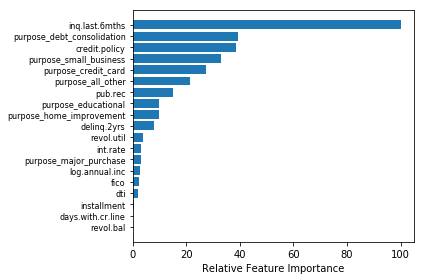

In [376]:
feature_importance = abs(model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

#### Predicting Y values with training data set

In [377]:
pred_y_train = model.predict(X_train )
pred_y_train


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Let us see accuracy of our model

In [378]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [379]:
score = accuracy_score(y_train, pred_y_train)
score

0.8423329355608592

Here the got accuracy is 65.71, which is same as that without model. So here classification accuracy is not a good measure.
Also here the target variable is imbalanced, so classification accuracy is not a good measure

In [380]:
y_train_prob = model.predict_proba(X_train)
y_train_prob

array([[0.82524942, 0.17475058],
       [0.86326824, 0.13673176],
       [0.89585136, 0.10414864],
       ...,
       [0.87662757, 0.12337243],
       [0.88305703, 0.11694297],
       [0.69131801, 0.30868199]])

#### Checking for AUC,

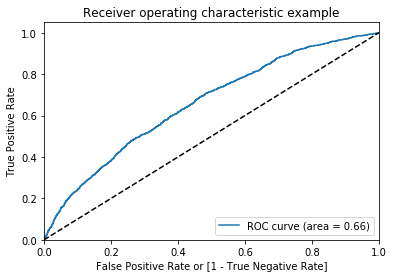

In [381]:
fpr, tpr, thresholds = draw_roc(y_train, y_train_prob[:,1])

In [382]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc(fpr, tpr)

0.6572749502395709

Here auc is 0.65 , so the model is good

#### Checking accuracy with test data set

In [383]:
pred_y_test = model.predict(X_test)
pred_y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [384]:
score_h = accuracy_score(y_test, pred_y_test)
score_h

0.8305497564370216

Here accuracy is 83.26%, the model accuracy is not much deviating from that of training data. So the model is not overfitting

#### AUC for test data

In [385]:
y_test_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc(fpr, tpr)

0.6444025683975433

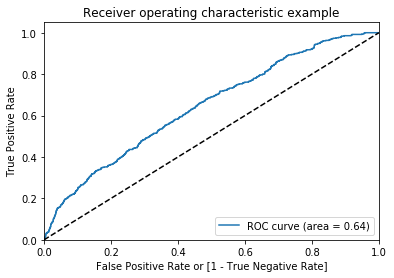

In [386]:
fpr, tpr, thresholds = draw_roc(y_test, y_test_prob[:,1])

Auc is also not deviating from train data

Now doing cross validation

In [387]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(model, X_train , y_train, cv = 10, scoring='roc_auc')

scores.mean()

0.6537306250198304

In [388]:
scores.std()

0.030157287746815333

So by cross validation we get the correct AUC of the model, that is 0.65433. It is the correct AUC with standard deviation of 0.033. Use this AUC as final statistics.

#### Now we need to try to improve AUC by Grid search Cross validation

In [302]:
from sklearn.model_selection import GridSearchCV

In [389]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [390]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

In [391]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [392]:
print("Tuned parameter : {}".format(clf.best_params_))

Tuned parameter : {'C': 59.94842503189409, 'penalty': 'l2'}


In [393]:
best_model = clf.best_estimator_

best_model.fit(X_train,y_train)

LogisticRegression(C=59.94842503189409, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### Checking AUC

In [395]:
y_train_prob = best_model.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc_d = auc(fpr, tpr)
auc_d

0.6616417455092363

In [396]:
y_test_prob = best_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc_h = auc(fpr, tpr)
auc_h

0.6491864328501216

Now auc has increased for both train and test data

#### Now checking rank ordering

In [397]:
Prediction = best_model.predict_proba(X_train)
train["prob_score"] = Prediction[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [399]:
train.head().T

,6649,4383,8821,1977,8378
credit.policy,1.000000,1.000000,0.000000,1.000000,0.000000
int.rate,0.177400,0.146100,0.175900,0.125300,0.186100
installment,504.300000,689.510000,107.850000,502.000000,419.290000
log.annual.inc,11.461632,11.652687,10.759072,11.734468,10.915088
dti,22.190000,1.820000,29.740000,15.830000,1.660000
fico,662.000000,767.000000,662.000000,702.000000,652.000000
days.with.cr.line,4421.000000,5821.000000,4500.000000,6420.041667,2280.000000
revol.bal,19828.000000,1.000000,2663.000000,109255.000000,2097.000000
revol.util,53.600000,0.000000,20.300000,63.400000,17.000000
inq.last.6mths,1.000000,2.000000,0.000000,0.000000,4.000000


#### Deciling

In [400]:
def deciles(x):
    decile = pd.Series(index=[0,1,2,3,4,5,6,7,8,9])
    for i in np.arange(0.1,1.1,0.1):
        decile[int(i*10)]=x.quantile(i)
    def z(x):
        if x<decile[1]: return(1)
        elif x<decile[2]: return(2)
        elif x<decile[3]: return(3)
        elif x<decile[4]: return(4)
        elif x<decile[5]: return(5)
        elif x<decile[6]: return(6)
        elif x<decile[7]: return(7)
        elif x<decile[8]: return(8)
        elif x<decile[9]: return(9)
        elif x<=decile[10]: return(10)
        else:return(np.NaN)
    s=x.map(z)
    return(s)

In [401]:
def Rank_Ordering(X,y,Target):
    X['decile']=deciles(X[y])
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_resp","max_resp","avg_resp",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank = Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"] = Rank["cnt_resp"]*100/Rank["cnt"]
    Rank["cum_resp"] = np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"] = np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"] = Rank["cum_resp"]/np.sum(Rank["cnt_resp"])
    Rank["cum_non_resp_pct"]=Rank["cum_non_resp"]/np.sum(Rank["cnt_non_resp"])
    Rank["KS"] = Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"]
    Rank
    return(Rank)

In [404]:
Rank = Rank_Ordering(train,"prob_score","not.fully.paid")
Rank

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,10,0.228046,0.851530,0.288149,671.0,232.0,439.0,34.575261,232.0,439.0,0.221585,0.077603,0.143983
8,9,0.191469,0.228005,0.207362,670.0,149.0,521.0,22.238806,381.0,960.0,0.363897,0.169701,0.194196
7,8,0.171983,0.191442,0.181480,670.0,119.0,551.0,17.761194,500.0,1511.0,0.477555,0.267103,0.210452
6,7,0.157345,0.171940,0.164208,671.0,118.0,553.0,17.585693,618.0,2064.0,0.590258,0.364858,0.225400
5,6,0.144206,0.157344,0.150547,670.0,107.0,563.0,15.970149,725.0,2627.0,0.692455,0.464380,0.228074
4,5,0.132474,0.144188,0.138119,670.0,80.0,590.0,11.940299,805.0,3217.0,0.768863,0.568676,0.200187
3,4,0.120619,0.132461,0.126540,671.0,85.0,586.0,12.667660,890.0,3803.0,0.850048,0.672264,0.177783
2,3,0.107694,0.120602,0.114401,670.0,78.0,592.0,11.641791,968.0,4395.0,0.924546,0.776914,0.147633
1,2,0.092318,0.107681,0.100280,670.0,45.0,625.0,6.716418,1013.0,5020.0,0.967526,0.887396,0.080130
0,1,0.044946,0.092276,0.080742,671.0,34.0,637.0,5.067064,1047.0,5657.0,1.000000,1.000000,0.000000


Best ks value getting is 22.8%.
Here KS is very low. 40-60% is desirable

Let us see the Rank Ordering on test Dataset

In [407]:
Prediction_h = best_model.predict_proba(X_test)
test["prob_score"] = Prediction_h[:,1]

Rank_h = Rank_Ordering(test,"prob_score","not.fully.paid")
Rank_h

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,10,0.231433,0.840164,0.297543,288.0,101.0,187.0,35.069444,101.0,187.0,0.207819,0.078308,0.129511
8,9,0.195061,0.231105,0.211014,287.0,67.0,220.0,23.344948,168.0,407.0,0.345679,0.170436,0.175244
7,8,0.174681,0.194841,0.183933,287.0,61.0,226.0,21.254355,229.0,633.0,0.471193,0.265075,0.206118
6,7,0.159290,0.174630,0.166549,288.0,46.0,242.0,15.972222,275.0,875.0,0.565844,0.366415,0.199428
5,6,0.146079,0.159283,0.152645,287.0,48.0,239.0,16.724739,323.0,1114.0,0.664609,0.466499,0.198110
4,5,0.134316,0.146068,0.140079,287.0,41.0,246.0,14.285714,364.0,1360.0,0.748971,0.569514,0.179457
3,4,0.123255,0.134267,0.128770,288.0,41.0,247.0,14.236111,405.0,1607.0,0.833333,0.672948,0.160385
2,3,0.109712,0.123243,0.116752,287.0,40.0,247.0,13.937282,445.0,1854.0,0.915638,0.776382,0.139256
1,2,0.093555,0.109642,0.101618,287.0,30.0,257.0,10.452962,475.0,2111.0,0.977366,0.884003,0.093363
0,1,0.040465,0.093529,0.082278,288.0,11.0,277.0,3.819444,486.0,2388.0,1.000000,1.000000,0.000000


Best KS is 20.6118 % percentage

In [409]:
LIFT = 35.069/14.6
LIFT

2.4019863013698632

Here lift is 2.4, which also not best for a model. Above 3.75 is desired.
Over all the model is not that good.